# M1.0 Découverte BDD

Ce document a simplement pour but de découvrir la BDD et de prendre en main Jupyter, AWS. 

## Tables et variables

In [1]:
from fonctions_perso import sql_request
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

result = sql_request("SHOW TABLES;")
result

slt gro


Tables_in_football
0             events
1           tracking

La BDD est constitué de deux tables event et tracking. On peut y accéder en créant des objets python, mais également grâce à des requêtes SQL (utile pour réaliser des sous-tables).

Dans cette première partie nous allons cibler le match 5.

In [12]:
#event = sql_request("SELECT * FROM events;")
#tckg = sql_request("SELECT * FROM tracking LIMIT 0,1000 ;")

#J'ai testé avec un where sans quote. Le pb vient bien de là....
#Idée : essayer de passer par des comparaisons d'entier en récupérant le nombre à la fin et en le convertissant..
#Idée : peut-être qu'il faut passer par les réglages de sql_read....

#event5 = sql_request("SELECT * FROM events WHERE SUBSTRING(match,9,1) AS int = 5;")
#tckg5 = sql_request("SELECT * FROM tracking WHERE match= "+chr(39)+"Match_005"+chr(39)+";")
#tckg5 = sql_request("SELECT * FROM tracking WHERE match LIKE \"Match_005\";")
#tckg5 = sql_request("SELECT * FROM tracking WHERE match = \"Match_005\";")

tckg5 = sql_request("SELECT * FROM events LIMIT 2")
## IMPOSSIBILITE DE METTRE DES GUILLEMETS DANS LES REQUETES SQL ?

In [14]:
tckg5.columns

Index(['period_id', 'MIN', 'SEC', 'Name (Event Types)', 'Outcome',
       'X Coordinates', 'Y Coordinates', 'Qualifier Type', 'Description',
       'Qualifier Value', 'date_id', 'match_id', 'name_id', 'team_id',
       'event_id'],
      dtype='object')

In [4]:
print(event.columns)
print(tckg.columns)

NameError: name 'event' is not defined

## A match fixé

### Gestion du temps

L'heure de jeu n'est pas codé de la même façon entre la table event et la table tracking. Dans la table tracking, on raisonne en %age du match. Afin de passer de l'un à l'autre, il faudra disposer de la durée précise du match. A première vue, il n'y a pas d'event "Fin du match" mais mon anglais a ses défauts. 

TODO : Récupérer sur OPTA la durée de jeu du match 

Dans un premier temps, je vais calculer time en faisant min:sec / max(min:sec). Mais cette façon de faire est très certainement imprécise. 

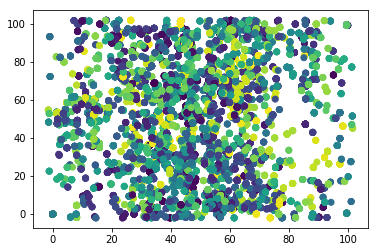

In [8]:
tmin = event.loc[:,'MIN']
tsec = event.loc[:,'SEC']
timesec = tmin*60 + tsec
tmax = max(timesec)
time = timesec / tmax
event['time']=time

match = 'Match_001'

eventMatch = event[event.match == match]
tckgMatch = tckg[tckg.match == match]


plt.scatter(eventMatch['X Coordinates'],eventMatch['Y Coordinates'],c=eventMatch.time)
plt.show()

#print(event1[time<0.001])
#print(tckg1[time<0.1])


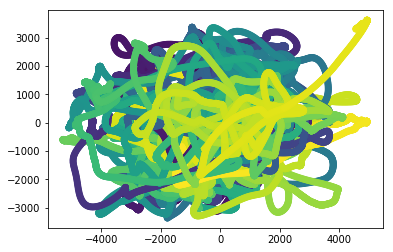

In [90]:
plt.scatter(tckgMatch[tckgMatch.name == 'Player_0080'].posx,tckgMatch[tckgMatch.name == 'Player_0080'].posy,c=tckgMatch[tckgMatch.name == 'Player_0080'].time)
plt.show()

In [9]:
set(eventMatch.MIN)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91}